In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regression/UkraineConflict.csv", encoding="latin1")
df.head()

,ï»¿EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,20-May-2019,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,NaN,1,...,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,NaN,1649875498
1,ROU1885,28-March-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,NaN,1649184809
2,ROU1940,28-July-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,crowd size=no report,1659462993
3,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1660055880
4,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882


In [4]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 96082
Columns: 31


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96082 entries, 0 to 96081
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿EVENT_ID_CNTY    96082 non-null  object 
 1   EVENT_DATE          96082 non-null  object 
 2   YEAR                96082 non-null  int64  
 3   TIME_PRECISION      96082 non-null  int64  
 4   DISORDER_TYPE       96082 non-null  object 
 5   EVENT_TYPE          96082 non-null  object 
 6   SUB_EVENT_TYPE      96082 non-null  object 
 7   ACTOR1              96082 non-null  object 
 8   ASSOC_ACTOR_1       6488 non-null   object 
 9   INTER1              96082 non-null  int64  
 10  ACTOR2              51829 non-null  object 
 11  ASSOC_ACTOR_2       14678 non-null  object 
 12  INTER2              96082 non-null  int64  
 13  INTERACTION         96082 non-null  int64  
 14  CIVILIAN_TARGETING  4188 non-null   object 
 15  ISO                 96082 non-null  int64  
 16  REGI

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing %": missing_percent
})

missing_df.head(10)


,Missing Count,Missing %
CIVILIAN_TARGETING,91894,95.641223
TAGS,90144,93.819862
ASSOC_ACTOR_1,89594,93.247434
ASSOC_ACTOR_2,81404,84.723465
ACTOR2,44253,46.057534
ADMIN3,2402,2.499948
ADMIN2,91,0.094711
ADMIN1,17,0.017693
EVENT_TYPE,0,0.000000
DISORDER_TYPE,0,0.000000


In [7]:
df.drop(columns=["ASSOC_ACTOR_1", "CIVILIAN_TARGETING", "TAGS"], inplace=True)


In [8]:

df["FATALITIES"].describe()


,FATALITIES
count,96082.000000
mean,0.443194
std,6.316090
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,600.000000


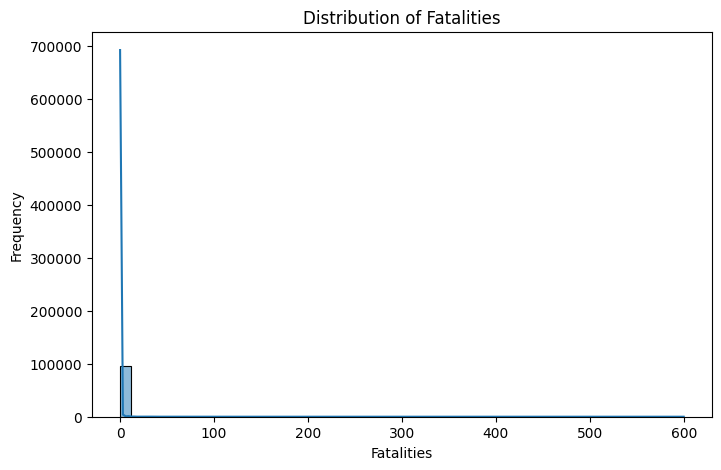

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["FATALITIES"], bins=50, kde=True)

plt.title("Distribution of Fatalities")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.show()


In [11]:
df["log_fatalities"] = np.log1p(df["FATALITIES"])


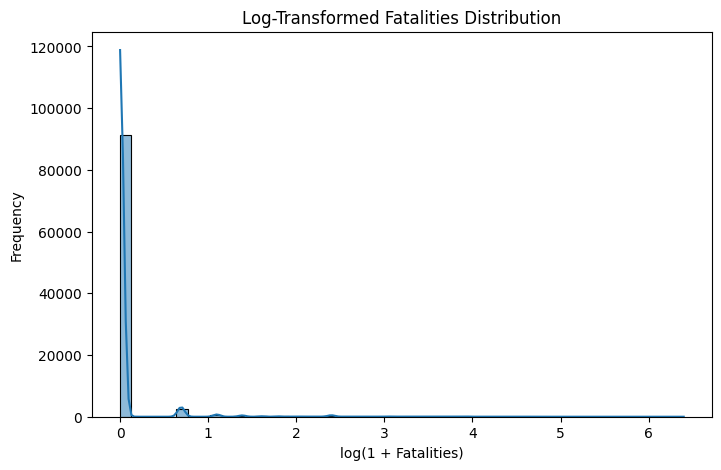

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["log_fatalities"], bins=50, kde=True)

plt.title("Log-Transformed Fatalities Distribution")
plt.xlabel("log(1 + Fatalities)")
plt.ylabel("Frequency")
plt.show()


In [13]:
df["EVENT_DATE"] = pd.to_datetime(df["EVENT_DATE"])


In [14]:
df["month"] = df["EVENT_DATE"].dt.month
df["day"] = df["EVENT_DATE"].dt.day
df["weekday"] = df["EVENT_DATE"].dt.weekday


In [15]:
event_fatalities = df.groupby("EVENT_TYPE")["FATALITIES"].mean().sort_values(ascending=False)
event_fatalities


,FATALITIES
EVENT_TYPE,
Violence against civilians,1.230556
Battles,0.699114
Explosions/Remote violence,0.362239
Strategic developments,0.010920
Riots,0.002381
Protests,0.000717


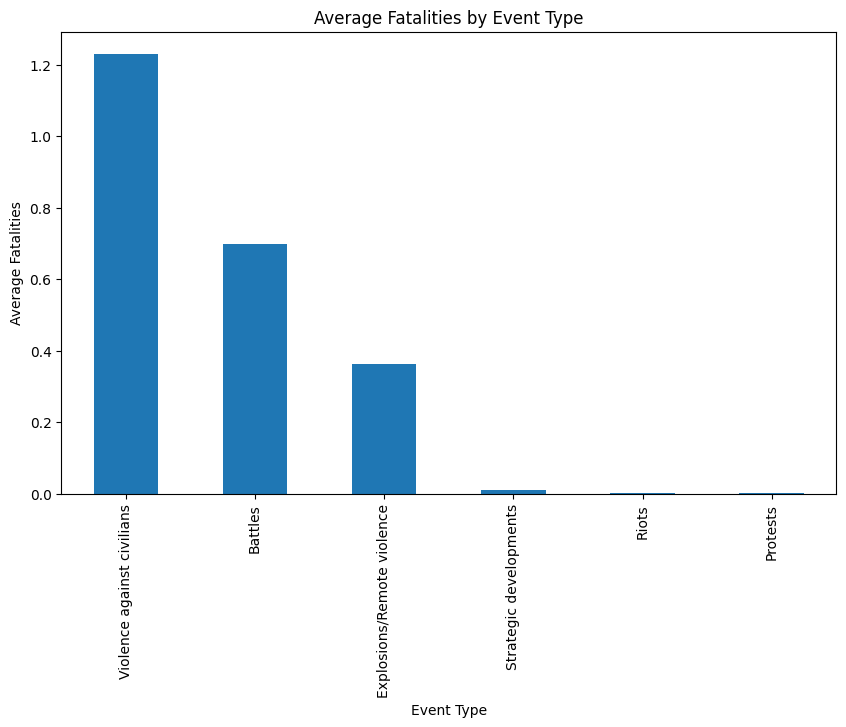

In [16]:
plt.figure(figsize=(10,6))
event_fatalities.plot(kind="bar")

plt.title("Average Fatalities by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Average Fatalities")
plt.show()


In [17]:
region_fatalities = df.groupby("REGION")["FATALITIES"].mean().sort_values(ascending=False)
region_fatalities


,FATALITIES
REGION,
Europe,0.443227
Middle East,0.000000


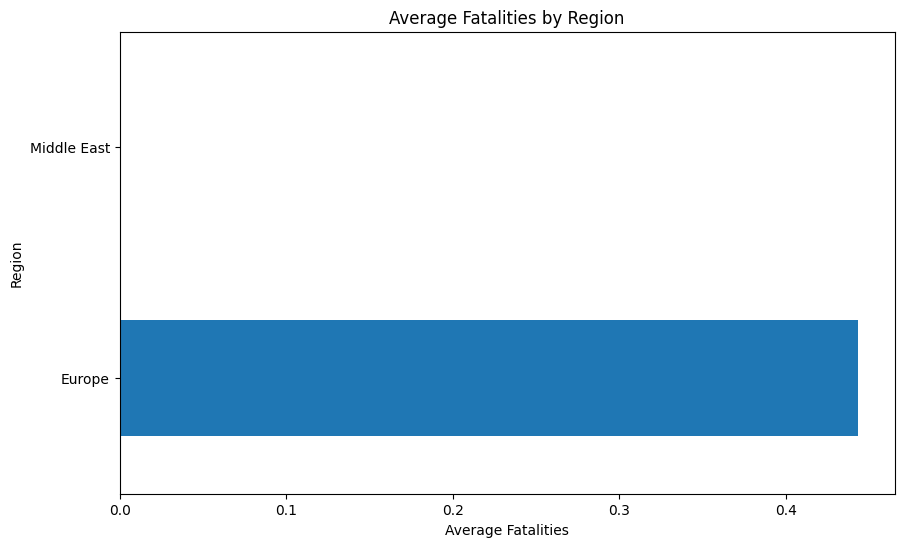

In [18]:
plt.figure(figsize=(10,6))
region_fatalities.plot(kind="barh")

plt.title("Average Fatalities by Region")
plt.xlabel("Average Fatalities")
plt.ylabel("Region")
plt.show()


In [19]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_cols.corr()


In [20]:
corr_matrix["FATALITIES"].sort_values(ascending=False)


,FATALITIES
FATALITIES,1.000000
log_fatalities,0.641678
INTER2,0.099128
YEAR,0.059950
TIMESTAMP,0.059229
TIME_PRECISION,0.055410
GEO_PRECISION,0.015216
INTER1,0.013263
LATITUDE,0.002670
ISO,0.000680


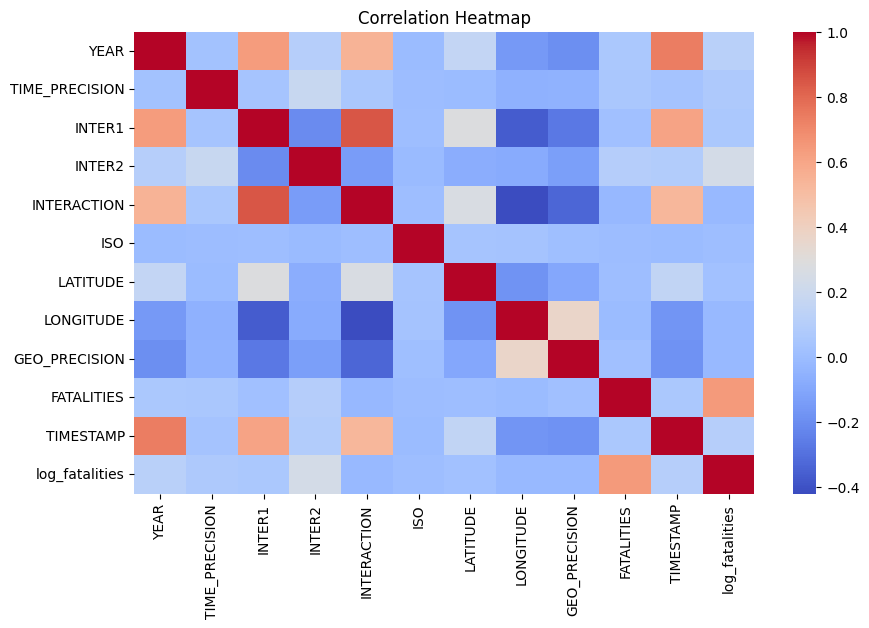

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


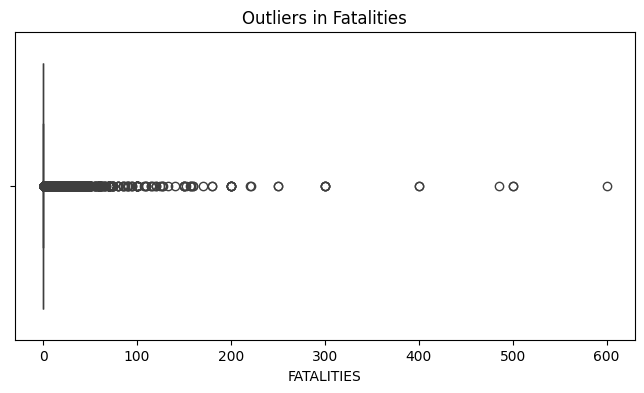

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["FATALITIES"])

plt.title("Outliers in Fatalities")
plt.show()


In [23]:
cap = df["FATALITIES"].quantile(0.99)
df["FATALITIES"] = np.where(df["FATALITIES"] > cap, cap, df["FATALITIES"])


In [24]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["EVENT_TYPE", "SUB_EVENT_TYPE", "REGION", "COUNTRY"]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [25]:
df.head()


,ï»¿EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,...,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,log_fatalities,month,day,weekday
0,ROU448,2019-05-20,2019,1,Political violence,5,5,Police Forces of Romania (2016-2019) Coast Guard,1,Civilians (Turkey),...,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0.0,1649875498,0.0,5,20,0
1,ROU1885,2022-03-28,2022,1,Strategic developments,4,7,Military Forces of Romania (2021-),1,Unidentified Military Forces,...,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0.0,1649184809,0.0,3,28,0
2,ROU1940,2022-07-28,2022,1,Demonstrations,2,17,Protesters (Romania),6,NaN,...,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0.0,1659462993,0.0,7,28,3
3,ROU1945,2022-07-31,2022,1,Strategic developments,4,7,Military Forces of Romania (2021-),1,Unidentified Armed Group (International),...,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0.0,1660055880,0.0,7,31,6
4,ROU1947,2022-08-04,2022,1,Demonstrations,2,17,Protesters (Romania),6,NaN,...,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0.0,1660055882,0.0,8,4,3


In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel


In [27]:
drop_cols = [
    "EVENT_ID_CNTY",
    "ACTOR1", "ACTOR2",
    "ASSOC_ACTOR_1", "ASSOC_ACTOR_2",
    "LOCATION",
    "ADMIN1", "ADMIN2", "ADMIN3",
    "NOTES", "SOURCE"
]

df = df.drop(columns=drop_cols, errors="ignore")


In [28]:
if "EVENT_DATE" in df.columns:
    df["EVENT_DATE"] = pd.to_datetime(df["EVENT_DATE"], errors="coerce")
    df["YEAR"] = df["EVENT_DATE"].dt.year
    df["MONTH"] = df["EVENT_DATE"].dt.month
    df = df.drop(columns=["EVENT_DATE"])


In [29]:
X = df.drop("FATALITIES", axis=1)
y = df["FATALITIES"]


In [31]:
small_cat_cols = ["EVENT_TYPE", "SUB_EVENT_TYPE", "DISORDER_TYPE", "REGION"]

X = pd.get_dummies(X, columns=small_cat_cols, drop_first=True)

X = X.fillna(0)

print(" Dataset Shape After Encoding:", X.shape)


 Dataset Shape After Encoding: (96082, 50)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(" Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


 Train Shape: (76865, 50)
Test Shape: (19217, 50)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])


In [34]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=300,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [35]:
y_pred_mlp = mlp_model.predict(X_test_scaled)

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\n MLP Neural Network Results")
print("RMSE:", rmse_mlp)
print("R² Score:", r2_mlp)



 MLP Neural Network Results
RMSE: 0.022847671325719465
R² Score: 0.9995851629180525


In [36]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results")
print("RMSE:", rmse_ridge)
print("R² Score:", r2_ridge)



Ridge Regression Results
RMSE: 0.3202569308345385
R² Score: 0.9184937785668191


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Keep only numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train[numeric_cols], y_train)

y_pred_rf = rf_model.predict(X_test[numeric_cols])

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results")
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)



Random Forest Results
RMSE: 0.0
R² Score: 1.0


In [38]:
ridge_params = {"alpha": [0.1, 1, 10, 50]}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring="r2"
)

ridge_grid.fit(X_train_scaled, y_train)

print("\n✅ Best Ridge Params:", ridge_grid.best_params_)
print("Best Ridge CV Score:", ridge_grid.best_score_)



✅ Best Ridge Params: {'alpha': 10}
Best Ridge CV Score: 0.9209277912708996


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [40]:

# Preprocessor: passthrough numeric, OneHotEncode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [43]:

# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# RF hyperparameter grid
rf_params = {
    "n_estimators": [100],
    "max_depth": [10],
    "min_samples_split": [2]
}

In [45]:


# GridSearchCV
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=2,
    scoring="r2",
    n_jobs=-1
)

# Fit
rf_grid.fit(X_train_processed, y_train)

# Results
print("\n✅ Best RF Params:", rf_grid.best_params_)
print("Best RF CV Score:", rf_grid.best_score_)


✅ Best RF Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV Score: 1.0


In [47]:

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessor: passthrough numeric, OneHotEncode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Feature selection using RandomForest
selector = SelectFromModel(
    RandomForestRegressor(random_state=42),
    threshold="median"
)

selector.fit(X_train_processed, y_train)

X_train_selected = selector.transform(X_train_processed)
X_test_selected = selector.transform(X_test_processed)

print("\n✅ Selected Feature Shape:", X_train_selected.shape)


✅ Selected Feature Shape: (76865, 76893)


In [48]:
final_ridge = Ridge(alpha=ridge_grid.best_params_["alpha"])
final_ridge.fit(X_train_selected, y_train)

y_pred_final_ridge = final_ridge.predict(X_test_selected)

rmse_final_ridge = np.sqrt(mean_squared_error(y_test, y_pred_final_ridge))
r2_final_ridge = r2_score(y_test, y_pred_final_ridge)


In [49]:
final_rf = RandomForestRegressor(
    **rf_grid.best_params_,
    random_state=42
)

final_rf.fit(X_train_selected, y_train)

y_pred_final_rf = final_rf.predict(X_test_selected)

rmse_final_rf = np.sqrt(mean_squared_error(y_test, y_pred_final_rf))
r2_final_rf = r2_score(y_test, y_pred_final_rf)


In [50]:
final_results = pd.DataFrame({
    "Model": ["MLP Neural Network", "Final Ridge", "Final Random Forest"],
    "Features Used": ["All Features", "Selected Features", "Selected Features"],
    "CV Score": ["-", ridge_grid.best_score_, rf_grid.best_score_],
    "Test RMSE": [rmse_mlp, rmse_final_ridge, rmse_final_rf],
    "Test R² Score": [r2_mlp, r2_final_ridge, r2_final_rf]
})

final_results


,Model,Features Used,CV Score,Test RMSE,Test R² Score
0,MLP Neural Network,All Features,-,0.022848,9.995852e-01
1,Final Ridge,Selected Features,0.920928,2494.711463,-4.945774e+06
2,Final Random Forest,Selected Features,1.0,0.000000,1.000000e+00
